In [1]:
%load_ext autoreload
%matplotlib inline

In [4]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'modules')
functionsdir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
sys.path.insert(0,functionsdir)
for includedir in [moduledir,functionsdir]:
    print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                     for x in glob.glob(os.path.join(includedir,'*.py'))])

from conditionalstats import *
from plot1DInvLog import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['conditionalstats']
Own modules available: ['plot1DInvLog']


In [6]:
emptyD = EmptyDistribution()
defaultD = Distribution()

In [7]:
print(defaultD)

bins : None
bintype : linear
density : None
fill_last_decade : None
name : 
nbpd : None
nlb : 50
nlr : None
nppb : None
percentiles : None
ranks : None
size : 0
vmax : None
vmin : None



# Test linear bins

In [68]:
x_norm = np.random.normal(size=100000) # Standard normal distribution
xmax = 4
xmin = -xmax

In [69]:
y_lognorm = np.exp(x_norm) # lognormal distribution from x
ymin,ymax = np.exp(xmin),np.exp(xmax)

In [9]:
dist_x_linear = Distribution(name='x',nlb=40)
dist_x_linear.computeDistribution(sample=x_norm,vmin=xmin,vmax=xmax)

In [70]:
dist_y_linear = Distribution(name='y',nlb=40)
dist_y_linear.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

In [10]:
# print(dist_x_linear)

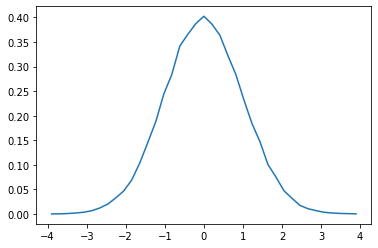

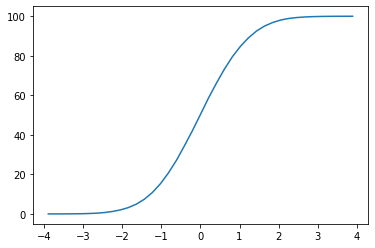

In [11]:
d = dist_x_linear
plt.plot(d.percentiles,d.density)
plt.figure()
plt.plot(d.percentiles,d.ranks)

# Test logarithmic bins

In [13]:
dist_y_log = Distribution(name='y',bintype='log',nbpd=50)
dist_y_log.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

In [14]:
# print(dist_y_log)

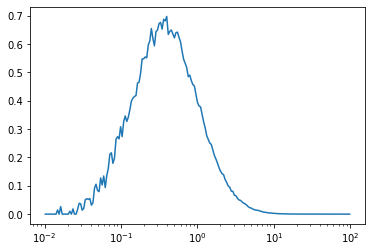

In [16]:
d = dist_y_log
plt.plot(d.percentiles,d.density)
plt.xscale('log')

Text(0.5, 1.0, 'ratios of consecutive bins')

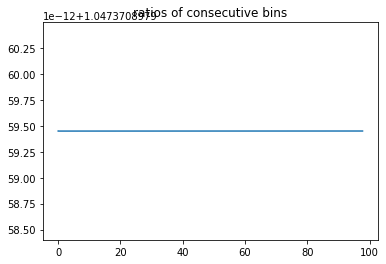

In [17]:
bin_ratios = dist_y_log.bins[1:]/dist_y_log.bins[:-1]
plt.plot(dist_y_log.percentiles,bin_ratios)
# plt.xscale('log')
plt.title('ratios of consecutive bins')

# Test linear ranks

In [18]:
dist_x_linQ = Distribution(name='x',bintype='linQ')
dist_x_linQ.computeDistribution(sample=x_norm,vmin=xmin,vmax=xmax)

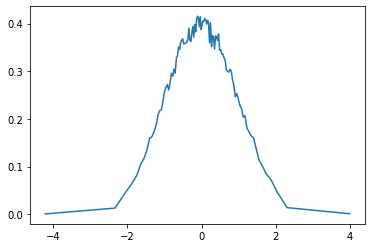

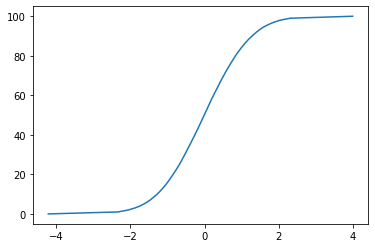

In [19]:
d = dist_x_linQ
plt.plot(d.percentiles,d.density)
plt.figure()
plt.plot(d.percentiles,d.ranks)

In [20]:
dist_y_linQ = Distribution(name='y',bintype='linQ')
dist_y_linQ.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

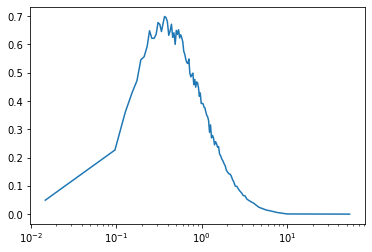

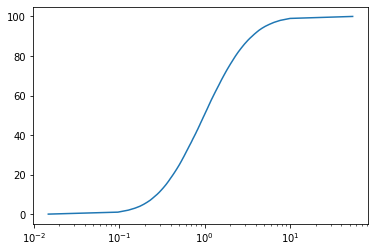

In [21]:
d = dist_y_linQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')

# Test inverse-logarithmic ranks

In [43]:
dist_y_invlogQ = Distribution(name='y',bintype='invlogQ',fill_last_decade=True)
dist_y_invlogQ.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

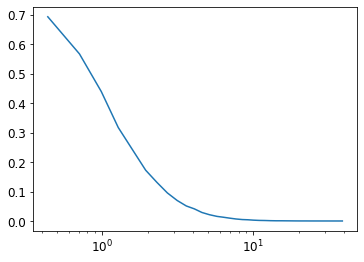

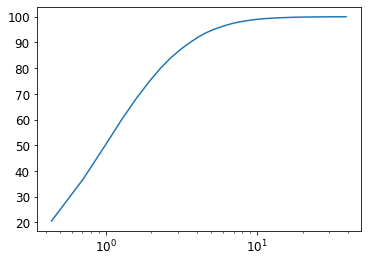

In [44]:
d = dist_y_invlogQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')

In [158]:
def plotMultiVisualization(axs,d,label,flipx=True,transformX=False):

    rankmin,rankmax = 10,99.99
    
    if isinstance(d,list):
        pass
#         for (dic,lab) in zip(d,label):
#             print(lab)
#             axs[0,0].plot(dic.percentiles,dic.density,label=lab)
#             axs[0,1].plot(dic.percentiles,dic.density)
#             axs[1,0].plot(dic.percentiles,dic.ranks)
#             axs[1,1].plot(dic.percentiles,dic.ranks)
# #         for i in (0,1):
# #             subplotRanksILog(axs[2,i],\
# #                              [dic.ranks for dic in d],\
# #                              [dic.percentiles for dic in d],\
# #                              rankmin=rankmin,rankmax=rankmax,\
#                                flipx=flipx,transformX=transformX)
#         axs[0,1].set_xscale('log')
#         axs[1,1].set_xscale('log')
#         axs[2,1].set_yscale('log')
    else:
        axs[0,0].plot(d.percentiles,d.density,label=label)
        axs[0,1].plot(d.percentiles,d.density)
        axs[0,1].set_xscale('log')
        axs[1,0].plot(d.percentiles,d.ranks)
        axs[1,1].plot(d.percentiles,d.ranks)
        axs[1,1].set_xscale('log')
        subplotRanksILog(axs[2,0],d.ranks,d.percentiles,\
                         rankmin=rankmin,rankmax=rankmax,\
                         flipx=flipx,transformX=transformX)
        subplotRanksILog(axs[2,1],d.ranks,d.percentiles,\
                         rankmin=rankmin,rankmax=rankmax,\
                         flipx=flipx,transformX=transformX)
        axs[2,1].set_yscale('log')

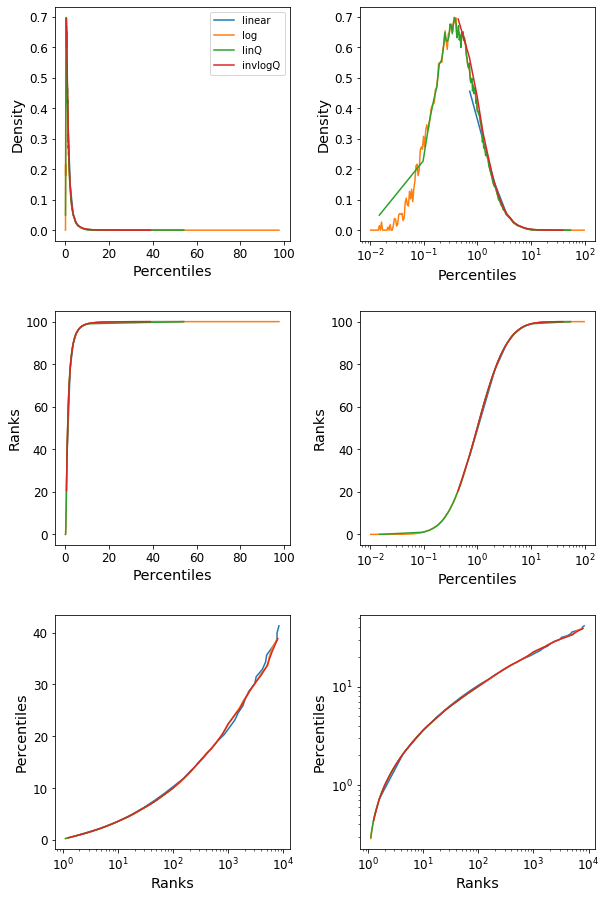

In [159]:
d_list = [dist_y_linear,dist_y_log,dist_y_linQ,dist_y_invlogQ]
d_lab = ['linear','log','linQ','invlogQ']

xlabels = ['Percentiles']*2+['Ranks']
ylabels = ['Density','Ranks','Percentiles']

fig,axs = plt.subplots(ncols=2,nrows=3,figsize=(10,15))

# inds2plot = [2]
inds2plot = (0,1,2,3)
# plotMultiVisualization(axs,[d_list[i_d] for i_d in inds2plot],\
#                            [d_lab[i_d] for i_d in inds2plot],\
#                        transformX=False)
for i_d in inds2plot:
    plotMultiVisualization(axs,d_list[i_d],label=d_lab[i_d],flipx=False,transformX=False)
# (to show overlap in this case, need transformX == False)

for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel(xlabels[i])
        axs[i,j].set_ylabel(ylabels[i])

axs[0,0].legend()

# x = np.flipud(1./(1-d.ranks/100.))
# transformXaxisIL(axs[2,0],x)